In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# concatenate the csv files.
# maybe just cat file1.csv file2.csv > outputfile.csv ...?
# todo: try and see what's fastest with many 'big' csv files
cwd = os.getcwd()
# for now...
os.chdir('/Users/geo/london_bikes/London-bikes-analysis/data')

files_names = [i for i in glob.glob('*.csv')]
# show list of all the files
print(files_names)

april_bikes_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
# ../ just to avoid concatenating with final_csv by mistake when re-running this cell
april_bikes_df.to_csv( "../final_csv.csv", index=False, encoding='utf-8')

['155JourneyDataExtract27Mar2019-02Apr2019.csv', '156JourneyDataExtract03Apr2019-09Apr2019.csv', '157JourneyDataExtract10Apr2019-16Apr2019.csv', '158JourneyDataExtract17Apr2019-23Apr2019.csv', '159JourneyDataExtract24Apr2019-30Apr2019.csv']


In [35]:
april_bikes_df.columns = ['rental_id',
                          'duration',
                          'bike_id',
                          'end_date',
                          'endstation_id',
                          'endstation_name',
                          'start_date',
                          'startstation_id',
                          'startstation_name']
april_bikes_df = april_bikes_df.drop(april_bikes_df[april_bikes_df.start_date.dt.month != 4].index)
print(april_bikes_df.head(3))
print(april_bikes_df.shape)

   rental_id  duration  bike_id            end_date  endstation_id  \
0   85543563       300     9684 2019-04-02 15:07:00             39   
4   85499459      1080    13129 2019-04-01 07:54:00            835   
7   85532453       960     8106 2019-04-02 07:52:00            835   

                      endstation_name          start_date  startstation_id  \
0  Shoreditch High Street, Shoreditch 2019-04-02 15:02:00              702   
4          Farringdon Street, Holborn 2019-04-01 07:36:00              553   
7          Farringdon Street, Holborn 2019-04-02 07:36:00              553   

              startstation_name  
0  Durant Street, Bethnal Green  
4    Regent's Row , Haggerston   
7    Regent's Row , Haggerston   
(880513, 9)


In [33]:
april_bikes_df['start_date'] = pd.to_datetime(april_bikes_df['start_date'], format = '%d/%m/%Y %H:%M')
april_bikes_df['end_date'] = pd.to_datetime(april_bikes_df['end_date'], format = '%d/%m/%Y %H:%M')

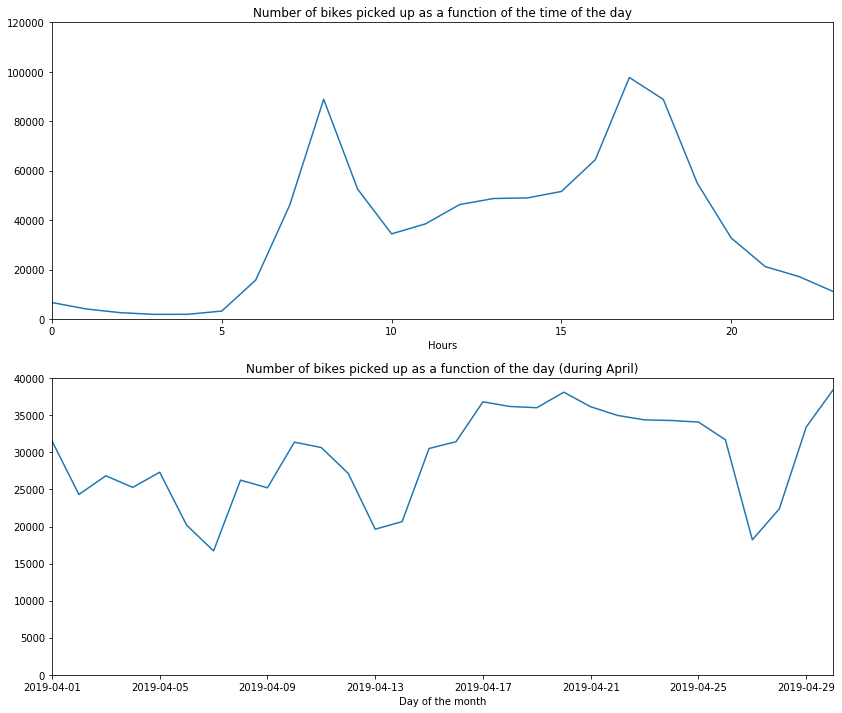

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,12))

ax1.set_ylim(0,120000)
ax1.set_title('Number of bikes picked up as a function of the time of the day', fontsize=12)

ax2.set_ylim(0,40000)
ax2.set_title('Number of bikes picked up as a function of the day (during April)', fontsize=12)

april_bikes_df.groupby(april_bikes_df['start_date'].rename('Hours').dt.hour).size().plot(ax=ax1)
april_bikes_df.groupby(april_bikes_df['start_date'].rename('Day of the month').dt.date).size().plot(ax=ax2)

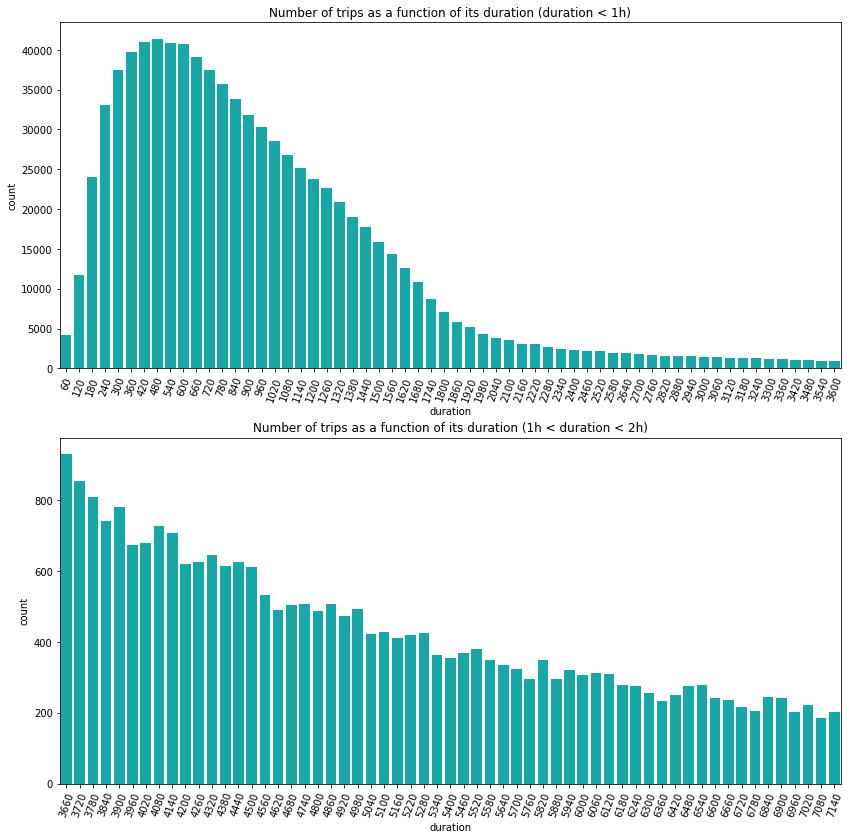

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,14))

sns.countplot(data = april_bikes_df[april_bikes_df['duration'] <= 3600],
              x = 'duration',
              ax = ax1,
              color = 'c').set_title('Number of trips as a function of its duration (duration < 1h)', fontsize=12)

sns.countplot(data = april_bikes_df[(april_bikes_df['duration'] > 3600) & (april_bikes_df['duration'] < 7200)],
              x = 'duration',
              ax = ax2,
              color = 'c').set_title('Number of trips as a function of its duration (1h < duration < 2h)', fontsize=12)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

In [43]:
print(april_bikes_df['duration'].mean())
print(april_bikes_df['duration'].std())
print(april_bikes_df['duration'].median())
print(april_bikes_df[april_bikes_df['duration'] < 10000].shape)

1278.182082490548
3826.1489623035272
2.9934302903450543
840.0
(873927, 9)
